In [1]:
from autolens import conf
from autolens.autofit import non_linear as nl
from autolens.pipeline import phase as ph
from autolens.imaging import image as im
from autolens.imaging import mask as ma
from autolens.lensing import ray_tracing
from autolens.galaxy import galaxy_model as gm
from autolens.galaxy import galaxy as g
from autolens.lensing import lensing_fitting
from autolens.lensing import lensing_image as li
from autolens.profiles import light_profiles as lp
from autolens.profiles import mass_profiles as mp
from autolens.plotting import imaging_plotters
from autolens.plotting import lensing_fitting_plotters

# Up to now, we've fitted some fairly crude and unrealistic lens models. For example, we'e completely omitted the lens
# galaxy's light, and its mass has been modeled as a sphere. Given most lens galaxies are literally called 'elliptical'
# galaxies, we should probably model their mass as elliptical. In this example, we'll start using a more realistic
# lens model.

# In my experience, the simplest lens model (e.g. that has the fewest parameters) that one can fit to a real strong 
# lens and still get a reasonable fit is as follows:

# 1) An elliptical Sersic light-profile for the lens galaxy's light.
# 2) A singular isothermal ellipsoid (SIE) mass-profile for the lens galaxy's mass.
# 3) An elliptical exponential light-profile for the source galaxy's light (to be honest, even this is a gross
# over-simplification, but lets worry about that later).

# This has a total of 18 non-linear parameters, which is over double the number of parameters we've fitted up to now.
# In future exercises, we'll fit even more complex models, with some 20-30+ non-linear parameters.

# The goal of this, rather short, exercise, is to fit this 'realistic' model to a simulated image, where the lens's
# light is visible and mass is elliptical. What could go wrong?

In [2]:
# Setups the path to this tutorial
path = 'path/to/AutoLens/workspace/howtolens/chapter_2_lens_modeling/' # <----- You must include this slash on the end

In [3]:
# Setup the config to this tutorial, so the non-linear search runs fast
conf.instance = conf.Config(config_path=path+'/configs/3_realism_and_complexity', output_path=path+"output")

In [4]:
# Another simulate image function, albeit it generates a new image
def simulate():

    from autolens.imaging import mask
    from autolens.galaxy import galaxy as g
    from autolens.lensing import ray_tracing

    psf = im.PSF.simulate_as_gaussian(shape=(11, 11), sigma=0.05, pixel_scale=0.05)
    image_plane_grids = mask.ImagingGrids.grids_for_simulation(shape=(130, 130), pixel_scale=0.1, psf_shape=(11, 11))

    lens_galaxy = g.Galaxy(light=lp.EllipticalSersic(centre=(0.0, 0.0), axis_ratio=0.9, phi=45.0, intensity=0.04,
                                                             effective_radius=0.5, sersic_index=3.5),
                           mass=mp.EllipticalIsothermal(centre=(0.0, 0.0), axis_ratio=0.8, phi=45.0, einstein_radius=0.8))

    source_galaxy = g.Galaxy(light=lp.EllipticalSersic(centre=(0.0, 0.0), axis_ratio=0.5, phi=90.0, intensity=0.03,
                                                       effective_radius=0.3, sersic_index=3.0))
    tracer = ray_tracing.TracerImageSourcePlanes(lens_galaxies=[lens_galaxy], source_galaxies=[source_galaxy],
                                                 image_plane_grids=[image_plane_grids])

    image_simulated = im.PreparatoryImage.simulate(array=tracer.image_plane_image_for_simulation, pixel_scale=0.1,
                                                   exposure_time=300.0, psf=psf, background_sky_level=0.1, add_noise=True)

    return image_simulated

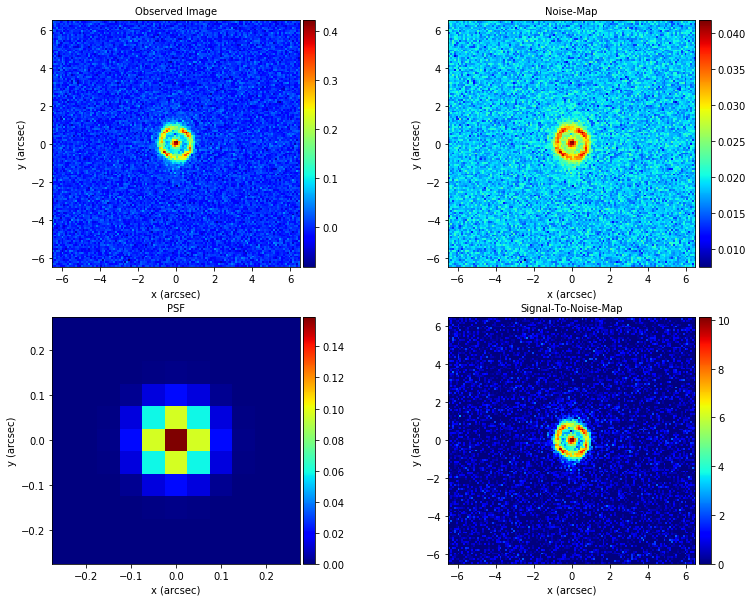

In [5]:
# Simulate the image and set it up.
image = simulate()

# When we plot it, the lens light's is clealy visible in the centre of the image
imaging_plotters.plot_image_subplot(image=image)

In [6]:
# Now lets fit it using a phase, noting that indeed the galaxy-model corresponds to the one above.

# Because we now have 18 non-linear parameters. the non-linear search takes a lot longer to run. On my laptop, this 
# phase took around an hour, which is a bit too long for you to wait if you want to go through these tutorials quickly. 
# Therefore, the results of this non-linear search (and future ones) are already included, allowing you to
# go through the tutorial as if you had actually run them.

# Nevertheless, you could try running it yourself (maybe over your lunch break?). All you need to do is change the 
# phase_name below, maybe to something like 'howtolens/3_realism_and_complexity_rerun'
phase = ph.LensSourcePlanePhase(lens_galaxies=dict(lens_galaxy=gm.GalaxyModel(light=lp.EllipticalSersic,
                                                                                mass=mp.EllipticalIsothermal)),
                                source_galaxies=dict(source_galaxy=gm.GalaxyModel(light=lp.EllipticalExponential)),
                                optimizer_class=nl.MultiNest,
                                phase_name='3_realism_and_complexity')


In [7]:
# Lets run the phase - note that, in Jupyter notebooks, all the MultiNest output is written to the cell. This might
# get pretty long, but I wouldn't worry about it for now as we'll address this in the pipelines tutorial.
results = phase.run(image)


DEBUG:autolens.pipeline.phase:
Running lens/source lensing for... 

Lens Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalSersic
centre: (-0.7112155572210787, -1.0436888727138316)
axis_ratio: 0.939433296466857
phi: 114.35602969312305
intensity: 0.026766445489248957
effective_radius: 1.0700316319676981
sersic_index: 2.816465319988347
Mass Profiles:
EllipticalIsothermal
centre: (0.16484460430173947, 0.18803515131635973)
axis_ratio: 0.62116304789161
phi: 17.99304192986622
einstein_radius: 2.565519046407051
slope: 2.0
core_radius: 0.0]

Source Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalExponential
centre: (1.6589727258012867, 0.12748993598197375)
axis_ratio: 0.4892667036352341
phi: 153.39282518447547
intensity: 0.7927852998379645
effective_radius: 0.3537368552030843
sersic_index: 1.0]




DEBUG:autolens.pipeline.phase:
Running lens/source lensing for... 

Lens Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalSersic
centre: (0.27570786426810506, 0.39617727269767156)
axis_ratio: 0.8684277871054762
phi: 81.28118739203856
intensity: 0.009927265015394478
effective_radius: 0.9586371093291897
sersic_index: 2.2812143443612922
Mass Profiles:
EllipticalIsothermal
centre: (-0.817861253612064, -0.150370832464077)
axis_ratio: 0.5314165605805329
phi: 61.676128569394805
einstein_radius: 3.269945024835653
slope: 2.0
core_radius: 0.0]

Source Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalExponential
centre: (1.651550155244706, 0.36035186710102074)
axis_ratio: 0.20825806753746845
phi: 64.45785265987399
intensity: 0.10027675248642128
effective_radius: 0.21389381090908585
sersic_index: 1.0]




DEBUG:autolens.pipeline.phase:
Running lens/source lensing for... 

Lens Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalSersic
centre: (0.03710446568001701, -0.008836995145822934)
axis_ratio: 0.6885154452976515
phi: 76.3557935114436
intensity: 0.05914951294667299
effective_radius: 0.725311751024877
sersic_index: 1.7463770072281224
Mass Profiles:
EllipticalIsothermal
centre: (1.587462837214894, -0.3343033661348341)
axis_ratio: 0.9458046432779361
phi: 84.99072785967837
einstein_radius: 0.452724367859253
slope: 2.0
core_radius: 0.0]

Source Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalExponential
centre: (-1.4148057954854754, -2.0362294359178135)
axis_ratio: 0.524683255870144
phi: 65.79623116324655
intensity: 0.2715614714676704
effective_radius: 0.031013141346707764
sersic_index: 1.0]




DEBUG:autolens.pipeline.phase:
Running lens/source lensing for... 

Lens Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalSersic
centre: (-0.17039625483724877, -0.08187121206330418)
axis_ratio: 0.7513214065464424
phi: 61.10849720168422
intensity: 0.050835005763945645
effective_radius: 0.9142338291883346
sersic_index: 1.0330608256365374
Mass Profiles:
EllipticalIsothermal
centre: (1.057770348221224, -1.5744306111818103)
axis_ratio: 0.88032912206803
phi: 71.57912786619424
einstein_radius: 3.560774066749663
slope: 2.0
core_radius: 0.0]

Source Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalExponential
centre: (0.9264419337348009, 0.6059262229669846)
axis_ratio: 0.5710595558940893
phi: 105.83362701870095
intensity: 0.5308668836452416
effective_radius: 0.17727139182361762
sersic_index: 1.0]




DEBUG:autolens.pipeline.phase:
Running lens/source lensing for... 

Lens Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalSersic
centre: (-0.0036243875490530606, 0.05590686423063065)
axis_ratio: 0.9241266734245408
phi: 105.14076687466792
intensity: 0.07031796876724623
effective_radius: 0.8605029558032414
sersic_index: 0.8368257966399955
Mass Profiles:
EllipticalIsothermal
centre: (-0.03227723491431054, -0.3695562721810326)
axis_ratio: 0.6046614379107289
phi: 122.35042147054587
einstein_radius: 2.4943710376827957
slope: 2.0
core_radius: 0.0]

Source Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalExponential
centre: (1.2037511241875816, 0.25576373233273986)
axis_ratio: 0.4544360368392932
phi: 108.09114206297234
intensity: 0.88423190535689
effective_radius: 0.07098526110746356
sersic_index: 1.0]




DEBUG:autolens.pipeline.phase:
Running lens/source lensing for... 

Lens Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalSersic
centre: (-0.06299918927543117, -0.06815456179162373)
axis_ratio: 0.9324466349444593
phi: 124.03658758462987
intensity: 0.07565475505408072
effective_radius: 0.790777946138866
sersic_index: 0.8255075082498695
Mass Profiles:
EllipticalIsothermal
centre: (0.639461824465398, 0.008367565855142442)
axis_ratio: 0.3122440013904435
phi: 102.6440439645506
einstein_radius: 2.5686055497698903
slope: 2.0
core_radius: 0.0]

Source Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalExponential
centre: (1.246744936647861, -1.9305108598894212)
axis_ratio: 0.37793929974192575
phi: 47.77913465352466
intensity: 0.8675941508106387
effective_radius: 0.08633468290603849
sersic_index: 1.0]




DEBUG:autolens.pipeline.phase:
Running lens/source lensing for... 

Lens Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalSersic
centre: (-0.009264092375034349, -0.0020176358184951656)
axis_ratio: 0.8633126885821678
phi: 75.61127556039584
intensity: 0.07220271762500119
effective_radius: 0.7739568633588956
sersic_index: 0.8220196593765821
Mass Profiles:
EllipticalIsothermal
centre: (0.07747737095019874, 0.1826940547522217)
axis_ratio: 0.7567493598045674
phi: 145.99826032244502
einstein_radius: 2.623933837689261
slope: 2.0
core_radius: 0.0]

Source Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalExponential
centre: (1.0170643115022955, 0.445683756743814)
axis_ratio: 0.5949167326966678
phi: 143.51105611543852
intensity: 0.14141018056323626
effective_radius: 0.2129816964701739
sersic_index: 1.0]




DEBUG:autolens.pipeline.phase:
Running lens/source lensing for... 

Lens Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalSersic
centre: (-0.008977434052721379, 0.033353200535023546)
axis_ratio: 0.9693433956622532
phi: 105.22658382388202
intensity: 0.06609857869713595
effective_radius: 0.7973520157669137
sersic_index: 0.9289493171632317
Mass Profiles:
EllipticalIsothermal
centre: (0.0011494174346326682, -1.0340416241603096)
axis_ratio: 0.555809518050616
phi: 130.42965682922875
einstein_radius: 1.5680425124548205
slope: 2.0
core_radius: 0.0]

Source Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalExponential
centre: (-0.004263629665947676, 0.43839138898444824)
axis_ratio: 0.5789328540706845
phi: 159.0485719156599
intensity: 0.33673886244599344
effective_radius: 0.23779828029815198
sersic_index: 1.0]




DEBUG:autolens.pipeline.phase:
Running lens/source lensing for... 

Lens Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalSersic
centre: (0.020552999984085864, -0.0245867775597587)
axis_ratio: 0.8958544071569217
phi: 109.69443077997919
intensity: 0.06449393318201187
effective_radius: 0.8700418381846335
sersic_index: 0.9102792766350978
Mass Profiles:
EllipticalIsothermal
centre: (-0.2776681910415465, -0.8043273180508222)
axis_ratio: 0.2647643208964038
phi: 145.62549814658402
einstein_radius: 2.4087158434447424
slope: 2.0
core_radius: 0.0]

Source Galaxy:
[Redshift: Constant 1
Light Profiles:
EllipticalExponential
centre: (-0.9463117925759275, -0.25952106141615733)
axis_ratio: 0.7742639305508028
phi: 116.218769216339
intensity: 0.30998707531547914
effective_radius: 0.13706983976256049
sersic_index: 1.0]




In [ ]:
# And lets look at the image.
lensing_fitting_plotters.plot_fitting_subplot(fit=results.fit)

NameError: name 'results' is not defined

In [ ]:
# Uh-oh. That image didn't look very good, did it? If we compare our inferred parameters to the actual values (in the
# simulations.py file) you'll see that we have, indeed, fitted the wrong model.
print(results)

In [ ]:
# Yep, we've inferred the wrong lens model. Or have we? Maybe you're thinking that this model provides an even higher 
# likelihood than the correct solution? Lets make absolutely sure it doesnt: (you've seen all this code below before,
# but I've put a few comments to remind you of whats happening)

# Create a lensing image to make the fit - the mask we used above was a 3" circle (we'll come back to this later)
mask = ma.Mask.circular(shape=image.shape, pixel_scale=image.pixel_scale, radius_mask_arcsec=3.0)
lensing_image = li.LensingImage(image=image, mask=mask)
imaging_plotters.plot_image(lensing_image.image)

# Make the tracer we use to simulate the image
lens_galaxy = g.Galaxy(light=lp.EllipticalSersic(centre=(0.0, 0.0), axis_ratio=0.9, phi=45.0, intensity=0.04,
                                                 effective_radius=0.5, sersic_index=3.5),
                       mass=mp.EllipticalIsothermal(centre=(0.0, 0.0), axis_ratio=0.8, phi=45.0, einstein_radius=0.8))

source_galaxy = g.Galaxy(light=lp.EllipticalSersic(centre=(0.0, 0.0), axis_ratio=0.5, phi=90.0, intensity=0.03,
                                                   effective_radius=0.3, sersic_index=3.0))
tracer = ray_tracing.TracerImageSourcePlanes(lens_galaxies=[lens_galaxy], source_galaxies=[source_galaxy],
                                             image_plane_grids=lensing_image.grids)


In [ ]:
# Now, lets fit the lensing image with the tracer and plot the fit. It looks a lot better than above, doesn't it?
fit = lensing_fitting.fit_lensing_image_with_tracer(lensing_image=lensing_image, tracer=tracer)
lensing_fitting_plotters.plot_fitting_subplot(fit=results.fit)

In [ ]:
# Finally, just to be sure, lets compare the two likelihoods
print('Likelihood of Non-linear Search:')
print(results.fit.likelihood)
print('Likelihood of Correct Model:')
print(fit.likelihood)

# Well, there we have it, the input model has a much higher likelihood than the one our non-linear search inferred. 

In [ ]:
# Clearly, our non-linear search failed. So, what happened? Where did it all go wrong?

# I want you to think about 'complexity'. As we made our lens model more realistic, we also made it more complex. Our
# non-linear parameter space went from 7 dimensions to 18. This means there was a much larger 'volume' of parameter
# space to search. Maybe, therefore, our non-linear search got lost. It found some region of parameter space that it
# thought was the highest likelihood region and decided to focus the rest of its search there. But it was mistaken,
# there was infact  another region of parameter space with even higher likelihood solutions.

# This region - the one our non-linear search failed to locate - is called the global maximum likelihood region. At its
# core, lens modeling is all about learning how to get a non-linear search to find this region of parameter space,
# even when the lens model is extremely complex.

# Iif you did run the phase above yourself, you might of actually inferred the correct lens model. There is some 
# level of randomness in a non-linear search. This means that sometimes, it might get infer a locally maximal likelihood,
# and other times find the global maxima another. Nevertheless, as lens models become more complex, you'll quickly find
# yourself stuck with only in local maxima, unless you learn how to navigate parameter space better.

In [ ]:
# And with that, we're done. In the next exercise, we'll learn how to deal with our failures and begin thinking about
# how we might encourage a non-linear search to find the global-maximum likelihood. Before that, think about the
# following:

# 1) When you look at an image of a strong lens, do you get a sense of roughly what values certain lens model
#    parameters are?

# 2) The non-linear search failed because parameter space was too complex. Could we make it less complex, whilst still
#    keeping our lens model fairly realistic?

# 3) The source galaxy in this example had only 6 non-linear parameters. Real source galaxies may have multiple
#    components (e.g. a bar, disk, bulge, star-forming knot) and there may even be more than 1 source galaxy! Do
#    you think there is any hope of us navigating a parameter space if the source contributes 20+ parameters by itself?